Start by importing basic magma and mantle functions.

In [1]:
from magma import *
from mantle import and_, or_, xor

We will also want to demonstrate compiling to verilog and generating test vectors.

In [2]:
from magma.backend.verilog import compile as compile_verilog
from magma.simulator.python_simulator import testvectors

First version of a Full Adder.

In order to make an adder, we create a subclass of `Circuit`. The class arguments are the name of the circuit ("FullAdder") and the interface. The adder interface has three inputs `a`, `b`, and `cin` which are type `In(Bit)`. There are two outputs `sum` and `cout` which are of type `Out(Bit)`.

The adder body is defined in the method `definition`. This method takes the interface as an argument (`io`). The inputs and outputs to the adder are accessed through `io`.

In [3]:
class FullAdder1(Circuit):
    name = "FullAdder1"
    IO = ["a", In(Bit), "b", In(Bit), "cin", In(Bit), "sum", Out(Bit), "cout", Out(Bit)]
    @classmethod
    def definition(io):
        # Compute the sum
        _sum = io.a ^ io.b ^ io.cin
        wire(_sum, io.sum)
        # Compute the carry
        cout = (io.a & io.b) | (io.b & io.cin) | (io.a & io.cin)
        # Wire cout
        wire(cout, io.cout)

`FullAdder1` can be converted to a verilog module. 

In [4]:
print(compile_verilog(FullAdder1))

compiling xor_wrapped
compiling and_wrapped
compiling or_wrapped
compiling FullAdder1
module xor_wrapped (input  I0, input  I1, output  O);
wire  inst0_out;
coreir_xor inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
endmodule

module and_wrapped (input  I0, input  I1, output  O);
wire  inst0_out;
coreir_and inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
endmodule

module or_wrapped (input  I0, input  I1, output  O);
wire  inst0_out;
coreir_or inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
endmodule

module FullAdder1 (input  a, input  b, input  cin, output  sum, output  cout);
wire  inst0_O;
wire  inst1_O;
wire  inst2_O;
wire  inst3_O;
wire  inst4_O;
wire  inst5_O;
wire  inst6_O;
xor_wrapped inst0 (.I0(a), .I1(b), .O(inst0_O));
xor_wrapped inst1 (.I0(inst0_O), .I1(cin), .O(inst1_O));
and_wrapped inst2 (.I0(a), .I1(b), .O(inst2_O));
and_wrapped inst3 (.I0(b), .I1(cin), .O(inst3_O));
or_wrapped inst4 (.I0(inst2_O), .I1(inst3_O), 

Next let's test the adder by using a list of test vectors,
which are enumerated manually.

In [5]:
full_adder_test_vectors = [
    [0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1],
    [1, 1, 1, 1, 1]
]

tests = testvectors(FullAdder1)
print( "Success" if tests == full_adder_test_vectors else "Failure" )

Success


Here is another way of generating an adder.

In [6]:
class FullAdder2(Circuit):
    name = "FullAdder2"
    IO = ["a", In(Bit), "b", In(Bit), "cin", In(Bit), "out", Out(Bit), "cout", Out(Bit)]
    @classmethod
    def definition(io):
        # Generate the sum
        sum_ = xor(xor(io.a, io.b), io.cin)
        wire(sum_, io.out)
        # Generate the carry
        ab = and_(io.a, io.b)
        bc = and_(io.b, io.cin)
        ca = and_(io.cin, io.a)
        carry = or_(or_(ab, bc), ca)
        wire(carry, io.cout)

In [7]:
print(compile_verilog(FullAdder2))

compiling xor_wrapped
compiling and_wrapped
compiling or_wrapped
compiling FullAdder2
module xor_wrapped (input  I0, input  I1, output  O);
wire  inst0_out;
coreir_xor inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
endmodule

module and_wrapped (input  I0, input  I1, output  O);
wire  inst0_out;
coreir_and inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
endmodule

module or_wrapped (input  I0, input  I1, output  O);
wire  inst0_out;
coreir_or inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
endmodule

module FullAdder2 (input  a, input  b, input  cin, output  out, output  cout);
wire  inst0_O;
wire  inst1_O;
wire  inst2_O;
wire  inst3_O;
wire  inst4_O;
wire  inst5_O;
wire  inst6_O;
xor_wrapped inst0 (.I0(a), .I1(b), .O(inst0_O));
xor_wrapped inst1 (.I0(inst0_O), .I1(cin), .O(inst1_O));
and_wrapped inst2 (.I0(a), .I1(b), .O(inst2_O));
and_wrapped inst3 (.I0(b), .I1(cin), .O(inst3_O));
and_wrapped inst4 (.I0(cin), .I1(a), .O(inst4_

In [8]:
tests = testvectors(FullAdder2)
print( "Success" if tests == full_adder_test_vectors else "Failure" )

Success


We can print the tests as a table.

In [9]:
print(" a  b ci  o co")
for test in tests:
    for t in test:
        print("{:2d}".format(t), end=' ')
    print()

 a  b ci  o co
 0  0  0  0  0 
 0  0  1  1  0 
 0  1  0  1  0 
 0  1  1  0  1 
 1  0  0  1  0 
 1  0  1  0  1 
 1  1  0  0  1 
 1  1  1  1  1 


Or plot them as waveforms.

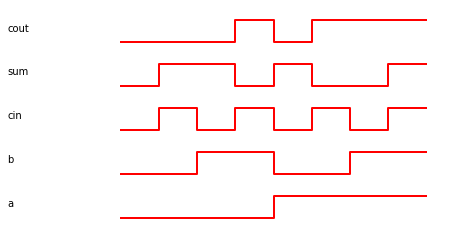

In [10]:
from magma.waveform import waveform

waveform(tests, ["a", "b", "cin", "sum", "cout"])